# Magnetic Anomaly Tests

## Lakeside Apartment Corridor

The magnetometer was pulled along a meandering straight path on a corridor. The measurements were taken on a forward leg and a backward leg. I pulled a little bit faster on the backward leg as I felt more comfortable pulling the truck. The plots below shows the magnetic anomaly profile from the forward leg and the backward leg. Note that the x-axis is time instead of distance. The time for the backward leg is reversed so the profile should look like that for the forward leg.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
data_forward = pd.read_csv('Files/Lakeside_Anomaly_Forward.csv')
data_forward

,Time (sec),Pitch (deg),Roll (deg),Yaw(deg),X-Acceleration (g),Y-Acceleration (g),Z-Acceleration (g),Pitch Rate (deg/sec),Roll Rate (deg/sec),Yaw Rate (deg/sec),Magnetic Field in X direction (uT),Magnetic Field in Y direction (uT),Magnetic Field in Z Direction (uT),Latitude (deg),Longitude (deg),Altitude (m)
0,6.884343e+08,0.428805,0.471710,31.250916,-0.007736,0.008942,0.996902,-0.001723,0.002478,-0.007828,-43.990417,110.017136,-246.901413,NaN,NaN,NaN
1,6.884343e+08,0.425187,0.472921,31.249035,-0.007141,0.006622,0.996628,-0.002209,0.002176,-0.010003,-43.910034,109.749832,-246.173965,NaN,NaN,NaN
2,6.884343e+08,0.430172,0.474858,31.249527,-0.007599,0.007523,0.997513,-0.003742,0.000432,-0.008857,-43.977036,109.213623,-246.633270,NaN,NaN,NaN
3,6.884343e+08,0.432886,0.478203,31.246860,-0.008057,0.008011,0.997162,-0.002639,-0.000189,-0.010784,-44.336334,109.206482,-246.946167,NaN,NaN,NaN
4,6.884343e+08,0.431866,0.480333,31.245924,-0.008423,0.007050,0.996078,-0.003340,-0.001331,-0.009707,-43.895386,109.060410,-247.317139,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482,6.884344e+08,0.637967,0.351735,39.138007,-0.007599,0.002777,0.994476,-0.005738,0.024406,0.005265,-68.418793,74.528183,-270.033691,NaN,NaN,NaN
483,6.884344e+08,0.621799,0.353766,39.157764,-0.011978,0.009979,0.997650,-0.003159,0.006565,-0.007114,-68.261032,74.464066,-270.081543,NaN,NaN,NaN
484,6.884344e+08,0.605358,0.438136,39.204008,-0.014954,0.001755,1.047897,0.003759,-0.008547,-0.003445,-68.161133,74.474442,-269.961609,NaN,NaN,NaN
485,6.884344e+08,0.590331,0.369722,39.229260,-0.004211,-0.004639,1.001251,-0.006391,0.003159,-0.000107,-68.634186,74.188141,-270.260010,NaN,NaN,NaN


In [3]:
# data processing
# time from zero
t_forward = np.array(data_forward['Time (sec)'])
t_forward = t_forward - t_forward[0]

# manetic field strength in nT
bx_forward = np.array(data_forward['Magnetic Field in X direction (uT)'])
by_forward = np.array(data_forward['Magnetic Field in Y direction (uT)'])
bz_forward = np.array(data_forward['Magnetic Field in Z Direction (uT)'])      # TODO: Fix the title capitalization in the csv file

b_forward = np.sqrt(bx_forward ** 2 + by_forward ** 2 + bz_forward ** 2) * 1000         # unit in nT

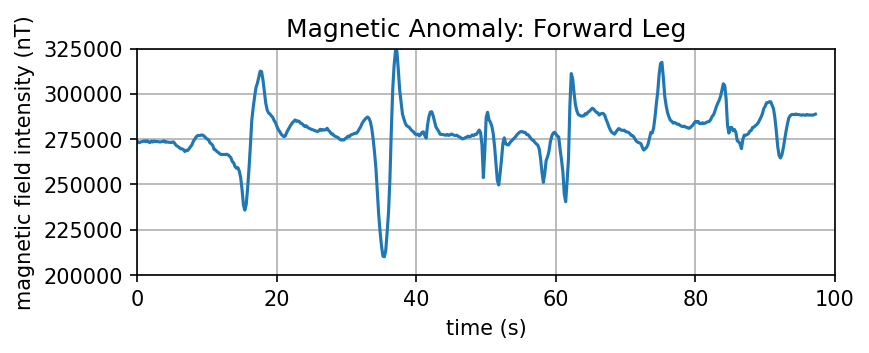

In [4]:
plt.figure(figsize=[6,2], dpi=150)
plt.plot(t_forward, b_forward)
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('magnetic field intensity (nT)')
plt.title('Magnetic Anomaly: Forward Leg')
plt.ylim(200000,325000)
plt.xlim(0,100)
plt.show()

In [5]:
data_backward = pd.read_csv('Files/Lakeside_Anomaly_Backward.csv')

In [6]:
# data processing
# time from the end
t_backward = np.array(data_backward['Time (sec)'])
t_backward = t_backward[-1] - t_backward

# manetic field strength in nT
bx_backward = np.array(data_backward['Magnetic Field in X direction (uT)'])
by_backward = np.array(data_backward['Magnetic Field in Y direction (uT)'])
bz_backward = np.array(data_backward['Magnetic Field in Z Direction (uT)'])      # TODO: Fix the title capitalization in the csv file

b_backward = np.sqrt(bx_backward ** 2 + by_backward ** 2 + bz_backward ** 2) * 1000         # unit in nT

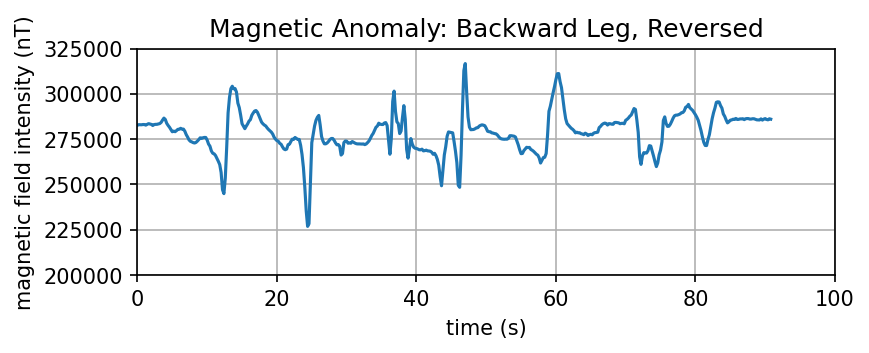

In [7]:
plt.figure(figsize=[6,2], dpi=150)
plt.plot(t_backward, b_backward)
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('magnetic field intensity (nT)')
plt.title('Magnetic Anomaly: Backward Leg, Reversed')
plt.ylim(200000,325000)
plt.xlim(0,100)
plt.show()

### Extra: random noise

I select the last 18 measurements at the end of the forward leg and the first 30 measurements of the backward leg to see the size of the random noise.

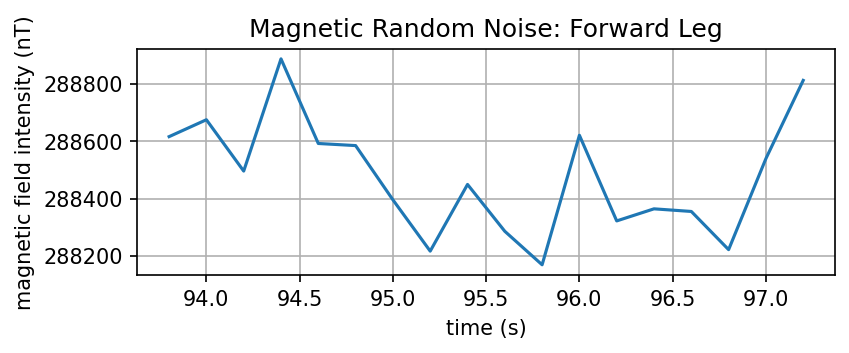

In [8]:
plt.figure(figsize=[6,2], dpi=150)
plt.plot(t_forward[-18:], b_forward[-18:])
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('magnetic field intensity (nT)')
plt.title('Magnetic Random Noise: Forward Leg')
plt.show()

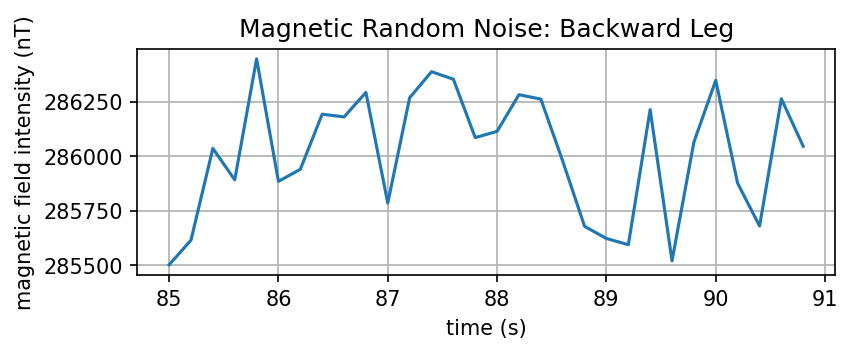

In [9]:
plt.figure(figsize=[6,2], dpi=150)
plt.plot(t_backward[:30], b_backward[:30])
plt.grid()
plt.xlabel('time (s)')
plt.ylabel('magnetic field intensity (nT)')
plt.title('Magnetic Random Noise: Backward Leg')
plt.show()

## Running track stadium


In [4]:
filename='Files/Princeton_running_track_2022-10-25.csv'

In [13]:
data_forward = pd.read_csv(filename,header=1)
data_forward.columns

Index(['Date', 'Speed', 'Altitude', 'Pressure', 'X', 'Y', 'Z', 'G', 'Latitude',
       'Longitude', 'Heading', 'Magnetic Field', 'Sound Level', 'Luminance',
       'Heart Rate'],
      dtype='object')

In [16]:
data_forward['Date'] = pd.to_datetime(data_forward['Date'])

Timestamp('2022-10-24 20:53:55.498000')

In [40]:
data_forward['Difference'] = data_forward['Date']-data_forward['Date'][0]

In [45]:
Time_seconds = []
for val in data_forward['Difference']: Time_seconds.append(val.total_seconds())

In [59]:
data_forward['Time_seconds'] = Time_seconds
velocity = 0.5 # m/s
data_forward['Distance_meters'] = data_forward['Time_seconds']*velocity
data_forward['Magnetic_Field_nT'] = data_forward['Magnetic Field']*1000

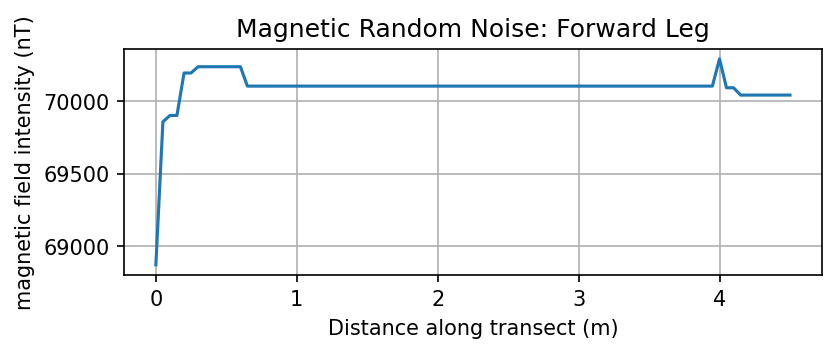

In [61]:
plt.figure(figsize=[6,2], dpi=150)
plt.plot(data_forward['Distance_meters'],data_forward['Magnetic_Field_nT'])
plt.grid()
plt.xlabel('Distance along transect (m)')
plt.ylabel('magnetic field intensity (nT)')
plt.title('Magnetic Random Noise: Forward Leg')
plt.show()

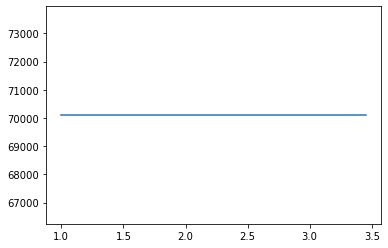

In [64]:
data_selected = data_forward[20:70]
plt.plot(data_selected['Distance_meters'],data_selected['Magnetic_Field_nT'])


In [65]:
print(data_selected['Magnetic_Field_nT'].describe())

count    5.000000e+01
mean     7.010382e+04
std      7.349827e-11
min      7.010382e+04
25%      7.010382e+04
50%      7.010382e+04
75%      7.010382e+04
max      7.010382e+04
Name: Magnetic_Field_nT, dtype: float64


## Onsite Towpath


In [1]:
filename='Files/run3.csv'

In [4]:
data_forward = pd.read_csv(filename,header=1)
data_forward.columns

Index(['Date', 'Speed', 'Altitude', 'Pressure', 'X', 'Y', 'Z', 'G', 'Latitude',
       'Longitude', 'Heading', 'Magnetic Field', 'Sound Level', 'Luminance',
       'Heart Rate'],
      dtype='object')

In [7]:
data_forward['Date'] = pd.to_datetime(data_forward['Date'])
data_forward['Difference'] = data_forward['Date']-data_forward['Date'][0]
Time_seconds = []
for val in data_forward['Difference']: Time_seconds.append(val.total_seconds())

In [8]:
data_forward['Time_seconds'] = Time_seconds
velocity = 0.1 # m/s
data_forward['Distance_meters'] = data_forward['Time_seconds']*velocity
data_forward['Magnetic_Field_nT'] = data_forward['Magnetic Field']*1000

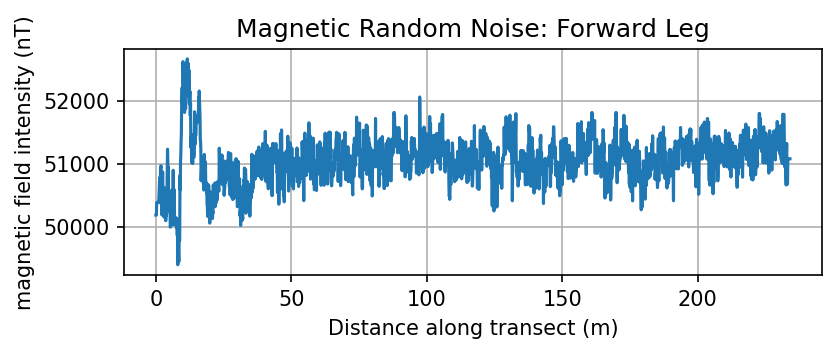

In [9]:
plt.figure(figsize=[6,2], dpi=150)
plt.plot(data_forward['Distance_meters'],data_forward['Magnetic_Field_nT'])
plt.grid()
plt.xlabel('Distance along transect (m)')
plt.ylabel('magnetic field intensity (nT)')
plt.title('Magnetic Random Noise: Forward Leg')
plt.show()

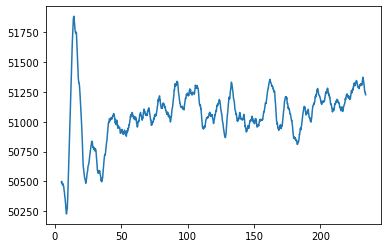

In [10]:
data_selected = data_forward['Magnetic_Field_nT'].rolling(50).mean()
plt.plot(data_forward['Distance_meters'],data_selected)